In [1]:
%matplotlib inline


# The Kolmogorov-Smirnov statistics


In this example, we illustrate how the Kolmogorov-Smirnov statistics is computed. 

* We generate a sample from a gaussian distribution. 
* We create a Uniform distribution which parameters are estimated from the sample.
* The Kolmogorov-Smirnov statistics is computed and plot on the empirical cumulated distribution function.



In [2]:
import openturns as ot
import openturns.viewer as viewer
from matplotlib import pylab as plt

ot.Log.Show(ot.Log.NONE)

The computeKSStatisticsIndex function computes the Kolmogorov-Smirnov distance between the sample and the distribution. Furthermore, it returns the index which achieves the maximum distance in the sorted sample. The following function is for teaching purposes only: use `FittingTest` for real applications.



In [3]:
def computeKSStatisticsIndex(sample, distribution):
    sample = ot.Sample(sample.sort())
    print("Sorted")
    print(sample)
    n = sample.getSize()
    D = 0.0
    index = -1
    D_previous = 0.0
    for i in range(n):
        F = distribution.computeCDF(sample[i])
        S1 = abs(F - float(i) / n)
        S2 = abs(float(i + 1) / n - F)
        print(
            "i=%d, x[i]=%.4f, F(x[i])=%.4f, S1=%.4f, S2=%.4f"
            % (i, sample[i, 0], F, S1, S2)
        )
        D = max(S1, S2, D)
        if D > D_previous:
            print("D max!")
            index = i
            D_previous = D
    observation = sample[index]
    return D, index, observation

The drawKSDistance function plots the empirical distribution function of the sample and the Kolmogorov-Smirnov distance at point x. The empirical CDF is a staircase function and is discontinuous at each observation. The computeEmpiricalCDF() method computes the probability P(X <= x), but this only takes into account for half the extreme values of the CDF. The other half is P(X < x) which is approximated by P(X <= x - delta) where delta is close to zero.

In [4]:
def drawKSDistance(sample, distribution, observation, D, distFactory):
    graph = ot.Graph("KS Distance = %.4f" % (D), "X", "CDF", True, "topleft")
    # Thick vertical line at point x
    ECDF_x_plus = sample.computeEmpiricalCDF(observation)
    ECDF_x_minus = ECDF_x_plus - 1.0 / sample.getSize()
    CDF_index = distribution.computeCDF(observation)
    curve = ot.Curve(
        [observation[0], observation[0], observation[0]],
        [ECDF_x_plus, ECDF_x_minus, CDF_index],
    )
    curve.setLegend("KS Statistics")
    curve.setLineWidth(4.0 * curve.getLineWidth())
    graph.add(curve)
    # Empirical CDF
    empiricalCDF = ot.UserDefined(sample).drawCDF()
    empiricalCDF.setLegends(["Empirical DF"])
    graph.add(empiricalCDF)
    #
    distname = distFactory.getClassName()
    distribution = distFactory.build(sample)
    cdf = distribution.drawCDF()
    cdf.setLegends([distname])
    graph.add(cdf)
    graph.setColors(ot.Drawable.BuildDefaultPalette(3))
    return graph

We generate a sample from a standard gaussian distribution.



In [5]:
N = ot.Normal()
n = 10
sample = N.getSample(n)

Compute the index which achieves the maximum Kolmogorov-Smirnov distance.



We then create a Uniform distribution which parameters are estimated from the sample. This way, the K.S. distance is large enough to being graphically significant.



In [6]:
distFactory = ot.UniformFactory()
distribution = distFactory.build(sample)
distribution

class=Uniform name=Uniform dimension=1 a=-2.48294 b=1.7388

Compute the index which achieves the maximum Kolmogorov-Smirnov distance.



In [7]:
D, index, observation = computeKSStatisticsIndex(sample, distribution)
print("D=", D, ", Index=", index, ", Obs.=", observation)

Sorted
0 : [ -2.18139  ]
1 : [ -1.26617  ]
2 : [ -0.438266 ]
3 : [ -0.355007 ]
4 : [  0.350042 ]
5 : [  0.608202 ]
6 : [  0.793156 ]
7 : [  0.810668 ]
8 : [  1.20548  ]
9 : [  1.43725  ]
i=0, x[i]=-2.1814, F(x[i])=0.0714, S1=0.0714, S2=0.0286
D max!
i=1, x[i]=-1.2662, F(x[i])=0.2882, S1=0.1882, S2=0.0882
D max!
i=2, x[i]=-0.4383, F(x[i])=0.4843, S1=0.2843, S2=0.1843
D max!
i=3, x[i]=-0.3550, F(x[i])=0.5040, S1=0.2040, S2=0.1040
i=4, x[i]=0.3500, F(x[i])=0.6710, S1=0.2710, S2=0.1710
i=5, x[i]=0.6082, F(x[i])=0.7322, S1=0.2322, S2=0.1322
i=6, x[i]=0.7932, F(x[i])=0.7760, S1=0.1760, S2=0.0760
i=7, x[i]=0.8107, F(x[i])=0.7802, S1=0.0802, S2=0.0198
i=8, x[i]=1.2055, F(x[i])=0.8737, S1=0.0737, S2=0.0263
i=9, x[i]=1.4372, F(x[i])=0.9286, S1=0.0286, S2=0.0714
D= 0.28431981766196146 , Index= 2 , Obs.= [-0.438266]


Get the value which maximizes the distance.



In [8]:
x = sample[index, 0]
x

-0.43826561996041397

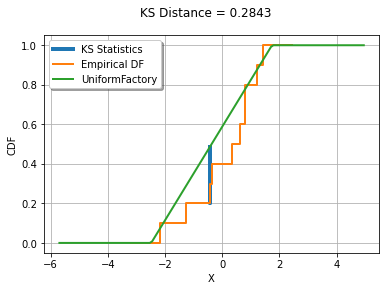

In [9]:
graph = drawKSDistance(sample, distribution, observation, D, distFactory)
view = viewer.View(graph)
plt.show()
figure = view.getFigure()
figure.savefig("KS_statistics.png", bbox_inches="tight")

We see that the K.S. statistics is achieved where the distance between the empirical distribution function of the sample and the candidate distribution is largest.



Sorted
0 : [ -2.29006   ]
1 : [ -1.31178   ]
2 : [ -1.28289   ]
3 : [ -0.560206  ]
4 : [ -0.470526  ]
5 : [ -0.139453  ]
6 : [ -0.0907838 ]
7 : [  0.261018  ]
8 : [  0.44549   ]
9 : [  0.995793  ]
i=0, x[i]=-2.2901, F(x[i])=0.0714, S1=0.0714, S2=0.0286
D max!
i=1, x[i]=-1.3118, F(x[i])=0.3266, S1=0.2266, S2=0.1266
D max!
i=2, x[i]=-1.2829, F(x[i])=0.3342, S1=0.1342, S2=0.0342
i=3, x[i]=-0.5602, F(x[i])=0.5227, S1=0.2227, S2=0.1227
i=4, x[i]=-0.4705, F(x[i])=0.5461, S1=0.1461, S2=0.0461
i=5, x[i]=-0.1395, F(x[i])=0.6324, S1=0.1324, S2=0.0324
i=6, x[i]=-0.0908, F(x[i])=0.6451, S1=0.0451, S2=0.0549
i=7, x[i]=0.2610, F(x[i])=0.7369, S1=0.0369, S2=0.0631
i=8, x[i]=0.4455, F(x[i])=0.7850, S1=0.0150, S2=0.1150
i=9, x[i]=0.9958, F(x[i])=0.9286, S1=0.0286, S2=0.0714
D= 0.22662133066305376 , Index= 1 , Obs.= [-1.31178]
Sorted
0 : [ -1.03808   ]
1 : [ -0.856712  ]
2 : [ -0.781366  ]
3 : [ -0.125498  ]
4 : [  0.0702074 ]
5 : [  0.322925  ]
6 : [  0.351418  ]
7 : [  0.445785  ]
8 : [  0.473617  ]
9

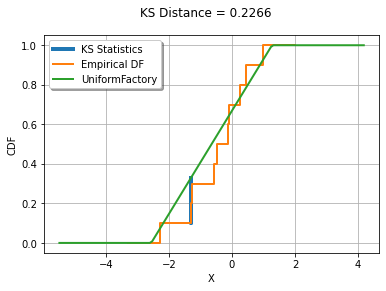

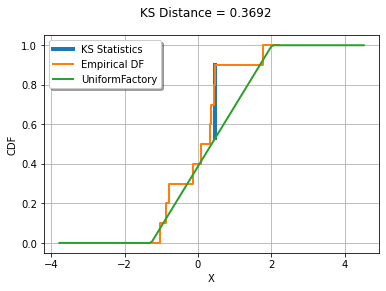

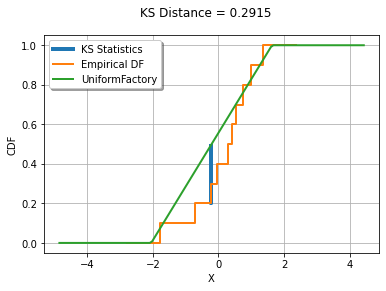

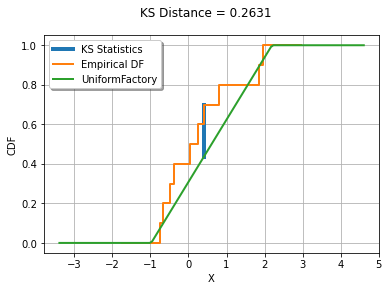

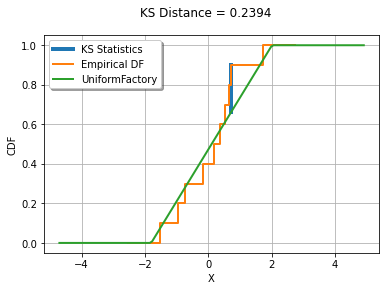

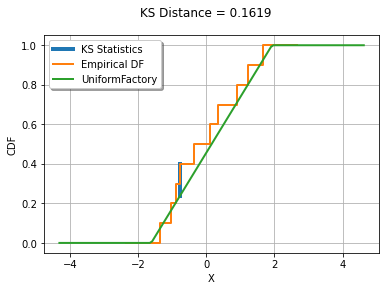

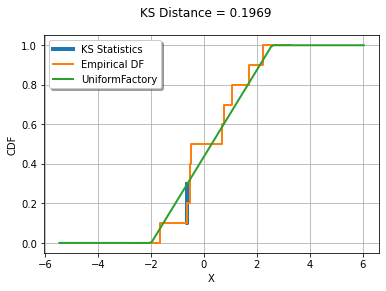

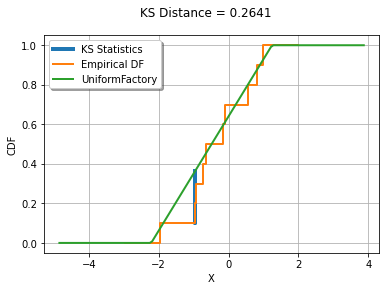

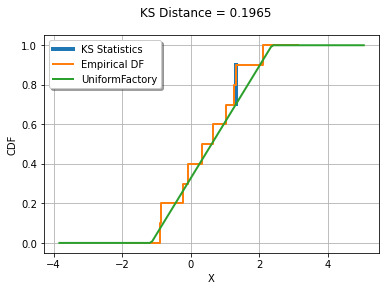

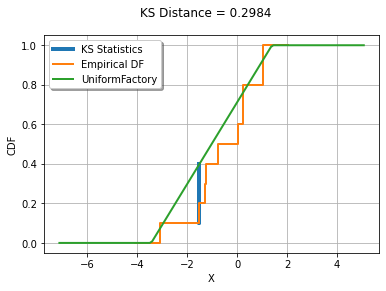

In [10]:
for i in range(10):
    N = ot.Normal()
    n = 10
    sample = N.getSample(n)
    distFactory = ot.UniformFactory()
    distribution = distFactory.build(sample)
    D, index, observation = computeKSStatisticsIndex(sample, distribution)
    print("D=", D, ", Index=", index, ", Obs.=", observation)
    graph = drawKSDistance(sample, distribution, observation, D, distFactory)
    view = viewer.View(graph)